In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from lmfit import Model

In [3]:
whits = pd.read_csv('/home/llr/ilc/ritzmann/work/res_csv_files/conf6_e-_GeV_5kevt_-42_-42_build_masked_params_sum_hits_weighted_mean_test.txt', header=0)

def func(x, a, b, c, d, e):
    return a*(e*x + b)**c + d

print(whits['mean'])

0       10.1961
1       19.0515
2       25.3127
3       34.4227
4       61.1804
5      127.2620
6      183.1220
7      217.4650
8      363.2070
9      591.7270
10     775.6800
11     933.7590
12    1074.9800
13    1373.2700
14    1622.9900
15    1835.6300
Name: mean, dtype: float64


(0.0, 30.0)

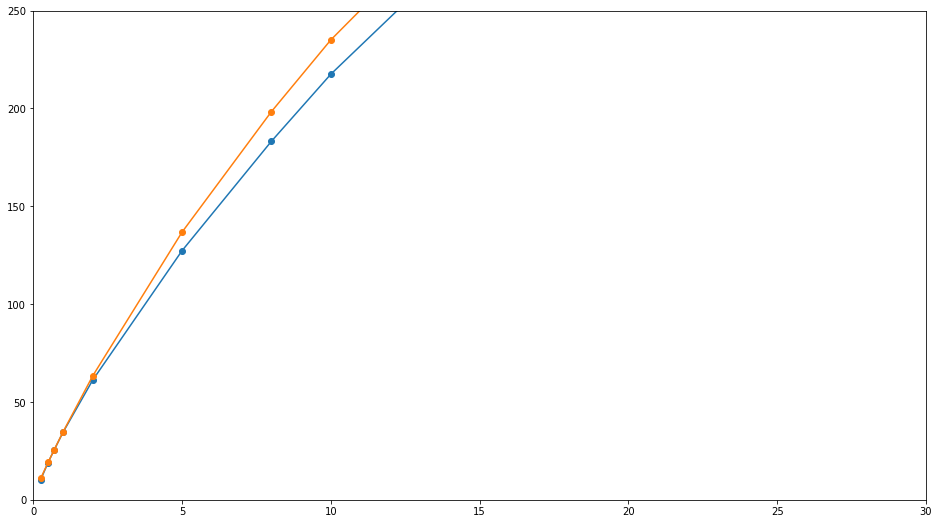

In [5]:
plt.figure(figsize=(16,9))
plt.plot(whits['energy'], whits['mean'], 'o-')
plt.plot(whits['energy'], func(whits['energy'], 116, 3.5, 0.52, -220, 1.035), 'o-')
plt.ylim(0,250)
plt.xlim(0,30)

In [33]:
paramet, cov = curve_fit(func, xdata=whits['energy'], ydata=whits['mean'], p0=[152, 6.99, 0.48, -381.12, 1.035])

[ 148.97933812    7.26525724    0.48360351 -381.12209819    1.03909392]


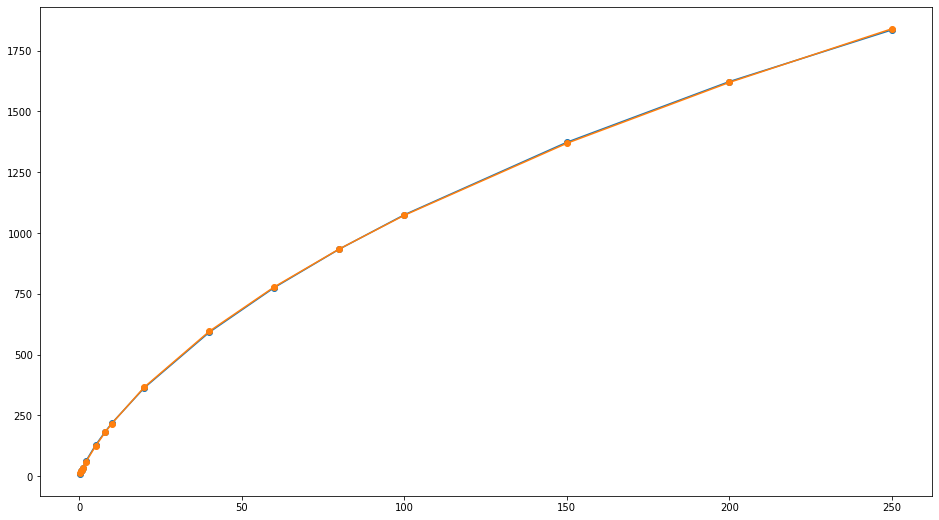

In [34]:
plt.figure(figsize=(16,9))
plt.plot(whits['energy'], whits['mean'], 'o-')
plt.plot(whits['energy'], func(whits['energy'],paramet[0], paramet[1], paramet[2], paramet[3], paramet[4]), 'o-')
#plt.ylim(0,250)
#plt.xlim(0,30)

print(paramet)

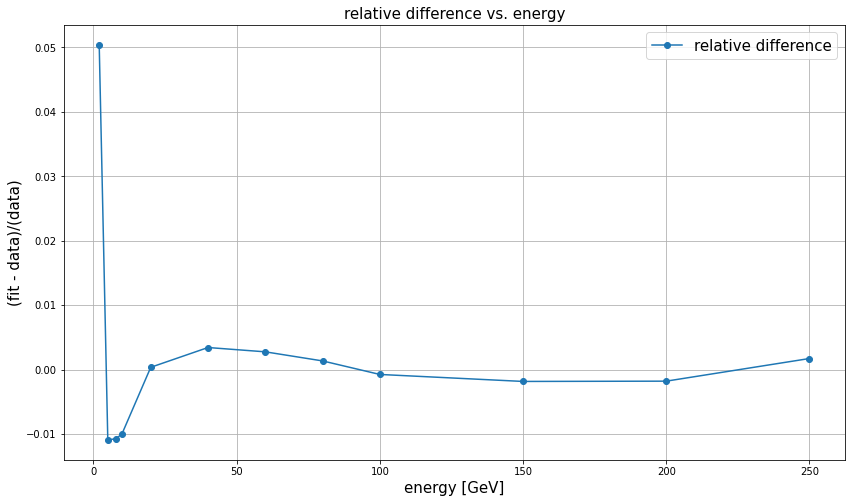

In [32]:
plt.figure(figsize=(14,8))
#plt.plot(whits['energy'], whits['mean'], 'o-', label = 'data')
plt.plot(whits['energy'][4:], (func(whits['energy'][4:],paramet[0], paramet[1], paramet[2], paramet[3], paramet[4]) - whits['mean'][4:])/whits['mean'][4:], 'o-', label = 'relative difference')
plt.legend(fontsize=15)
plt.title('relative difference vs. energy', fontsize=15)
plt.xlabel('energy [GeV]', fontsize=15)
plt.ylabel('(fit - data)/(data)', fontsize=15)
plt.grid()

In [29]:
print(func(whits['energy'][0],params[0], params[1], params[2], params[3]))

10.433410589478235


In [19]:
ydata = whits['mean']
xdata = whits['energy']

In [26]:
gmodel = Model(func)
params = gmodel.make_params(a=145, b=7.58, c=0.48, d=-381, e=1.035)
result=gmodel.fit(ydata, params, x=xdata)
print(result.fit_report())

[[Model]]
    Model(func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 39
    # data points      = 16
    # variables        = 5
    chi-square         = 136.210649
    reduced chi-square = 12.3827863
    Akaike info crit   = 44.2658217
    Bayesian info crit = 48.1287653
[[Variables]]
    a:  137.034963 +/- 5837652.23 (4259972.84%) (init = 145)
    b:  8.63585936 +/- 760418.498 (8805359.91%) (init = 7.58)
    c:  0.48360316 +/- 0.01190119 (2.46%) (init = 0.48)
    d: -381.123545 +/- 47.3913171 (12.43%) (init = -381)
    e:  1.23511546 +/- 108755.822 (8805316.23%) (init = 1.035)
[[Correlations]] (unreported correlations are < 0.100)
    C(b, e) =  1.000
    C(a, e) = -1.000
    C(a, b) = -1.000
    C(c, d) =  0.988
    C(b, c) = -0.306
    C(c, e) = -0.306
    C(a, c) =  0.306
    C(b, d) = -0.297
    C(d, e) = -0.297
    C(a, d) =  0.297


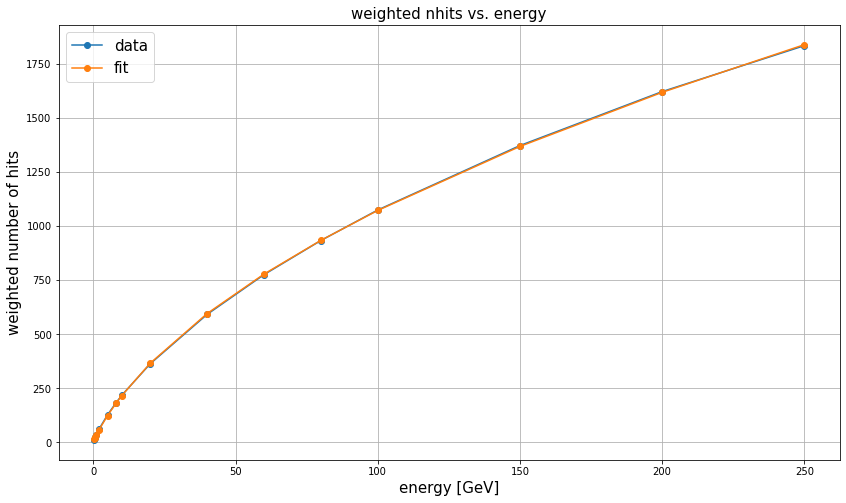

In [27]:
plt.figure(figsize=(14,8))
plt.plot(whits['energy'], whits['mean'], 'o-', label = 'data')
plt.plot(whits['energy'], result.best_fit, 'o-', label = 'fit')
plt.legend(fontsize=15)
plt.title('weighted nhits vs. energy', fontsize=15)
plt.xlabel('energy [GeV]', fontsize=15)
plt.ylabel('weighted number of hits', fontsize=15)
plt.grid()

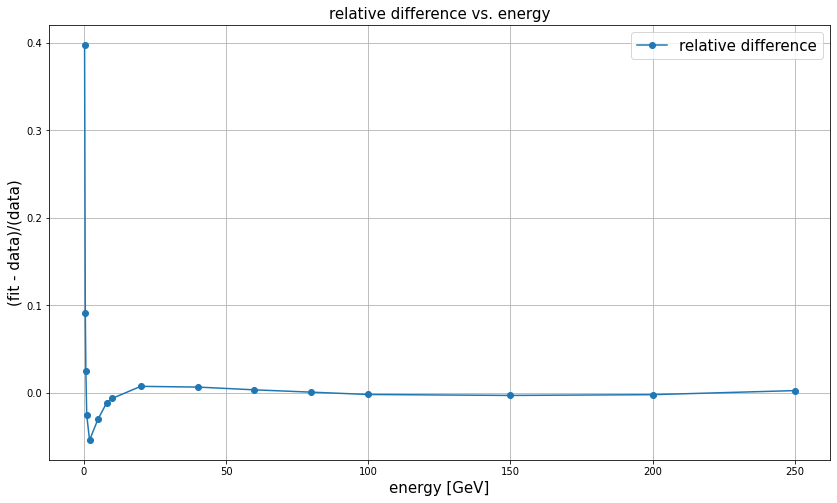

In [28]:
plt.figure(figsize=(14,8))
#plt.plot(whits['energy'], whits['mean'], 'o-', label = 'data')
plt.plot(whits['energy'], (result.best_fit - whits['mean'])/whits['mean'], 'o-', label = 'relative difference')
plt.legend(fontsize=15)
plt.title('relative difference vs. energy', fontsize=15)
plt.xlabel('energy [GeV]', fontsize=15)
plt.ylabel('(fit - data)/(data)', fontsize=15)
plt.grid()

(0.0, 400.0)

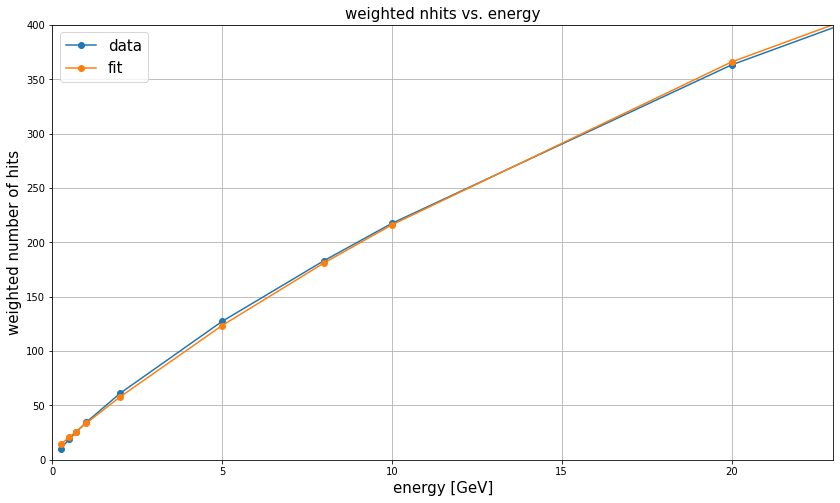

In [80]:
plt.figure(figsize=(14,8))
plt.plot(whits['energy'], whits['mean'], 'o-', label = 'data')
plt.plot(whits['energy'], result.best_fit, 'o-', label = 'fit')
plt.legend(fontsize=15)
plt.title('weighted nhits vs. energy', fontsize=15)
plt.xlabel('energy [GeV]', fontsize=15)
plt.ylabel('weighted number of hits', fontsize=15)
plt.grid()
plt.xlim(0,23)
plt.ylim(0,400)